In [1]:
cd ..

/Users/nicolas.peruchot/workdir/peafowl


In [2]:
from datasets import load_dataset
from peafowl.models.clustering import Cluster_words
from peafowl.preprocessing.utils import lemmatizer_dataset
import pandas as pd

import hdbscan
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
import seaborn as sns
import umap

from gensim.models import Word2Vec


In [3]:
data_tot = load_dataset('amazon_reviews_multi','en')['train']
data=data_tot['review_body']
stars=data_tot['stars']

data=pd.Series([e for i,e in enumerate(data) if i<1000])
stars=pd.Series([e for i,e in enumerate(stars) if i<1000])

Reusing dataset amazon_reviews_multi (/Users/nicolas.peruchot/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)
100%|██████████| 3/3 [00:00<00:00, 352.15it/s]


In [4]:
model=Cluster(data=data)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
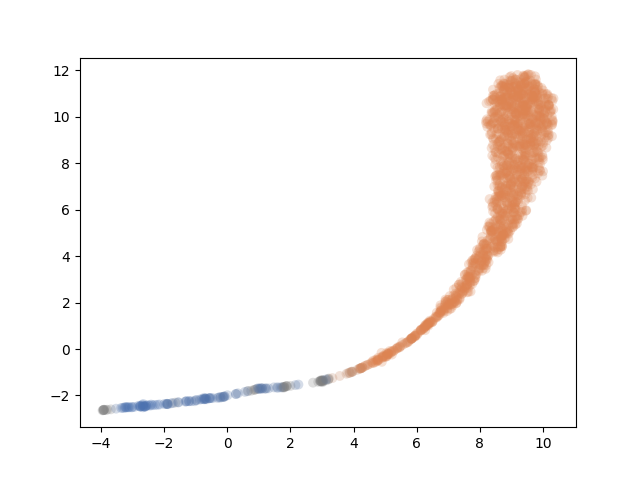

In [5]:
%matplotlib widget
model.viz()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
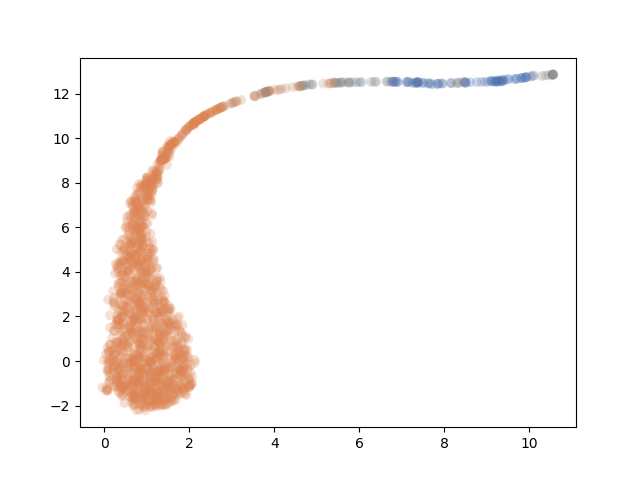

In [9]:
data = data
lemmatized_data=lemmatizer_dataset(data)
embed_model = Word2Vec(lemmatized_data, min_count=2, vector_size=300)
reducer = umap.UMAP()
vectors = embed_model.wv.vectors
umap_vectors = reducer.fit_transform(vectors)
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(umap_vectors)

def viz():
    %matplotlib widget
    color_palette = sns.color_palette("deep", len(np.unique(clusterer.labels_)))
    cluster_colors = [
        color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_
    ]
    cluster_member_colors = [
        sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)
    ]

    fig, ax = plt.subplots()
    sc = plt.scatter(
        *umap_vectors.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25
    )

    cursor = mplcursors.cursor(sc, hover=True)

    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set(text=list(model.wv.index_to_key)[sel.target.index])